In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

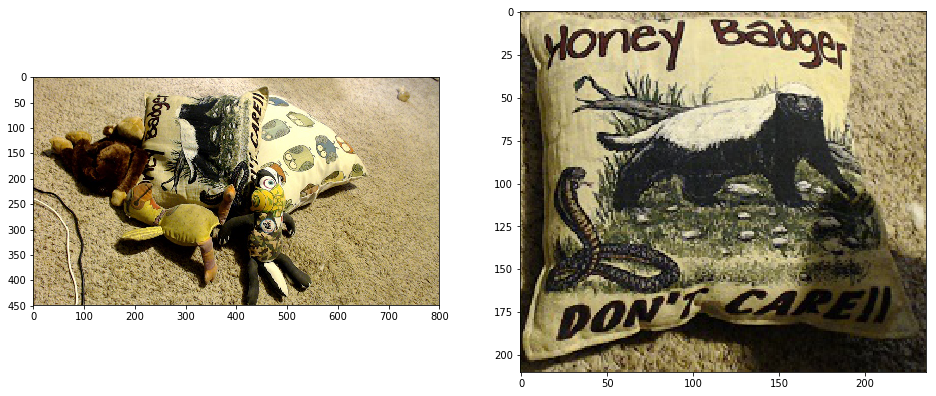

In [18]:
img = cv2.imread('matching-image.jpg')
temp = cv2.imread('matching-template.jpg')

img0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
temp0 = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
temp_= cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

_, ax = plt.subplots(1,2, figsize=(16,9))
ax[0].imshow(img_)
ax[1].imshow(temp_)


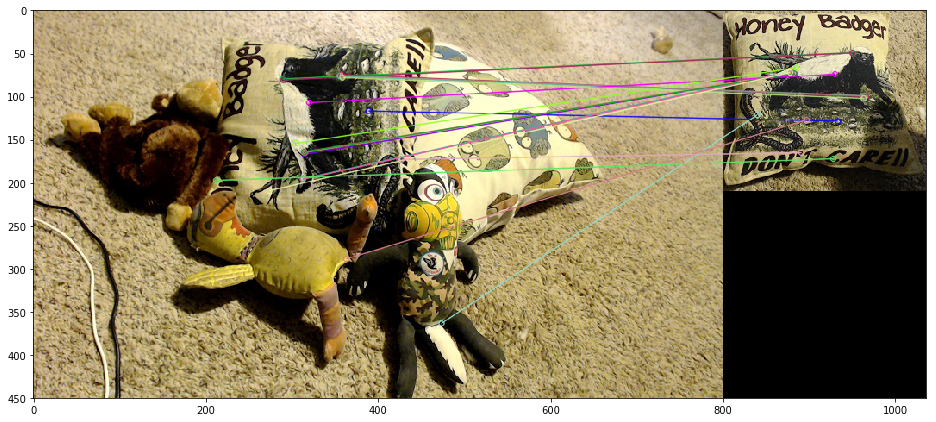

In [26]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img0, None)
kp2, des2 = orb.detectAndCompute(temp0, None)

brute = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = brute.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img, kp1, temp, kp2, matches[:20], None, flags = 2)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,9))
plt.imshow(img3)